In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind


In [2]:
data = pd.read_csv('stud_math.csv')
display(data.head())


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,...,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,...,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,...,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,...,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,...,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0


In [3]:
data.describe()

,age,Medu,Fedu,traveltime,studytime,failures,"studytime, granular",famrel,freetime,goout,health,absences,score
count,395.000000,392.000000,371.000000,367.000000,388.000000,373.000000,388.000000,368.000000,384.000000,387.000000,380.000000,383.000000,389.000000
mean,16.696203,2.750000,2.614555,1.438692,2.038660,0.337802,-6.115979,3.937500,3.231771,3.105943,3.531579,7.279373,52.262211
std,1.276043,1.098127,2.228732,0.694181,0.842078,0.743135,2.526235,0.927277,0.993940,1.115896,1.396019,23.465197,22.919022
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,-12.000000,-1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,-6.000000,4.000000,3.000000,2.000000,3.000000,0.000000,40.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,-6.000000,4.000000,3.000000,3.000000,4.000000,4.000000,55.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,-3.000000,5.000000,4.000000,4.000000,5.000000,8.000000,70.000000
max,22.000000,4.000000,40.000000,4.000000,4.000000,3.000000,-3.000000,5.000000,5.000000,5.000000,5.000000,385.000000,100.000000


In [4]:
data.info()
#в датасете 13числовых и 17 строковых столбцов

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

In [5]:
def view_column_info(column):
    
    print('\nВ столбце {} уникальных значений {}'.format(column.name, column.nunique()))   
    
    if column.dtype == 'object':
        print(column.unique())  
        display(pd.DataFrame(column.value_counts()).style.bar(align='mid'))
        sns.boxplot(x=column, y='score',
               data=data[['score', column.name]])
   
    elif column.dtype in ['float64', 'int64']:
        print(sorted(column.unique()))         
        Q1 = column.quantile(0.25)
        Q3 = column.quantile(0.75)
        IQR = Q3-Q1
        print('Границы выбросов [{}, {}]'.format(Q1-1.5*IQR, Q3+1.5*IQR)) 
        print(column.describe())       
        pd.DataFrame(column[column.between(Q1-1.5*IQR, Q3+1.5*IQR)]).hist(bins=10)
        plt.show()
        sns.boxplot(x = column,
                    data=pd.DataFrame(column))
        
    else:
        print("Невозможно отразить инфо")
        
    


def remove_nan(column, new_value):

    data[column] = data[column].apply(lambda x: new_value if pd.isnull(x) else x)
    


В столбце score уникальных значений 18
[0.0, 20.0, 25.0, 30.0, 35.0, 40.0, 45.0, 50.0, 55.0, 60.0, 65.0, 70.0, 75.0, 80.0, 85.0, 90.0, 95.0, 100.0]
Границы выбросов [-5.0, 115.0]
count    389.000000
mean      52.262211
std       22.919022
min        0.000000
25%       40.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64


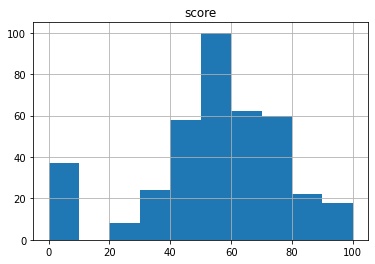

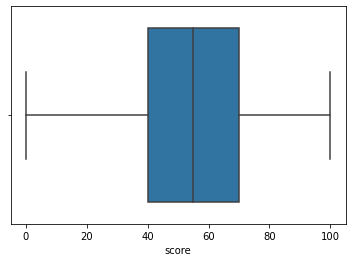

In [6]:
#score - столбец, который мы и хотим предсказать, поэтому строки с пропусками уберем из дата сета
#выбросов нет. Много оценок 0. Есть разрыв до ближайшей минимальной - 20 балов
#на графике видно, что основная масса учеников получает 40-70 баллов.

data = data[pd.isnull(data.score)==False]
view_column_info(data.score)



В столбце school уникальных значений 2
['GP' 'MS']


,school
GP,344
MS,45


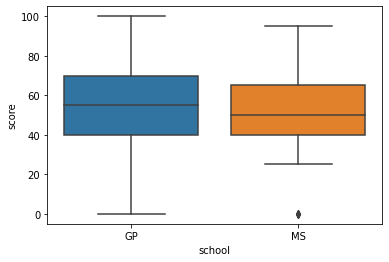

In [7]:
#school в столбце нет пустот. В школе GP учащихся больше (либо просто по ним больше статистики)
#средние показатели не сильно отличаются, в левой немного выше серединное значение. В правой наблюдается выброс

view_column_info(data.school)


В столбце sex уникальных значений 2
['F' 'M']


,sex
F,204
M,185


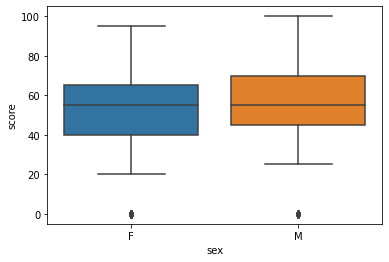

In [8]:
#sex учатся и мальчики и девочки, соотношение по половому признакому почти одинаковое 
#Серединное значение у обоих полов близко
#У девочек разброс оценок ниже среднего большой, а выше среднего - наоборот, оценки кучнее
#У мальчиков противоложная картина

view_column_info(data.sex)


В столбце age уникальных значений 8
[15, 16, 17, 18, 19, 20, 21, 22]
Границы выбросов [13.0, 21.0]
count    389.000000
mean      16.673522
std        1.265662
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64


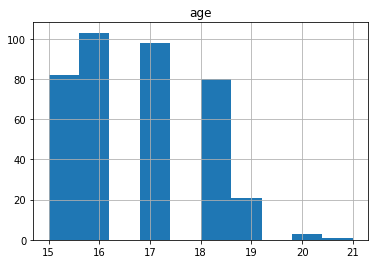

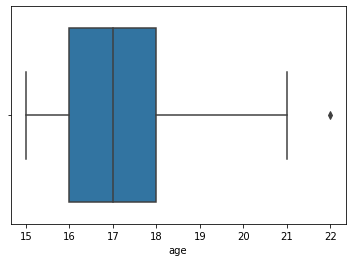

In [9]:
#age пустот нет. Есть выбросы. Больше всего учащихся в возрасте 16-18 лет, но есть аномалии  (21, 22 года). 
#С увеличением возвраста - сокращается количество учащихся. Возможно оставались на второй год?

view_column_info(data.age)


В столбце address уникальных значений 2
['U' None 'R']


,address
U,291
R,83


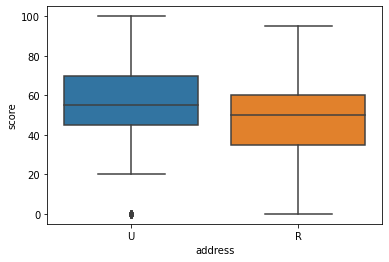

In [10]:
#address заменим nan
#учащихся с города, гораздо больше, чем тех, кто проживает за городом.
#возможно за городом есть проблемы с доступностью школ
#возможно загородних жителей не интересует обучение из-за других интересов/потребностей

remove_nan('address', None)
view_column_info(data.address)


В столбце famsize уникальных значений 2
[None 'GT3' 'LE3']


,famsize
GT3,255
LE3,107


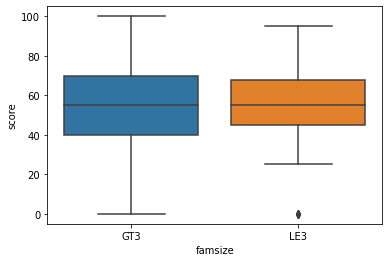

In [11]:
#famsize заменим nan
#больший разброс оценок у учащихся из больших семей. Среднице показатели близки

remove_nan('famsize', None)
view_column_info(data.famsize)


В столбце Pstatus уникальных значений 2
['A' None 'T']


,Pstatus
T,308
A,36


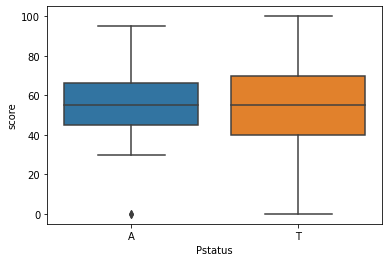

In [12]:
#Pstatus заменим nan
#Учеников, живущих с родителями гораздо больше отдельноживущих.
#Оценки отдельноживущих учеников имеют меньший разброс по сравнению с живущими с родителями
#Средние показатели обоих категорий похожи

remove_nan('Pstatus', None)
view_column_info(data.Pstatus)


В столбце Medu уникальных значений 5
[0.0, 1.0, 2.0, 3.0, 4.0]
Границы выбросов [-1.0, 7.0]
count    389.000000
mean       2.768638
std        1.090230
min        0.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        4.000000
Name: Medu, dtype: float64


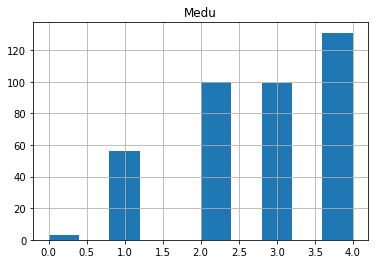

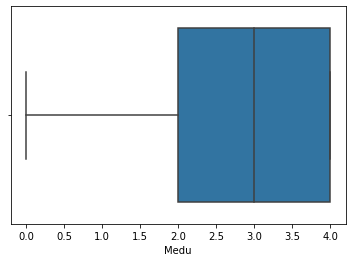

In [13]:
#Medu есть пустоты, выбросов нет. Заменим пустоты на медиану
#с увеличением уровня образования матери - увеличивается количество учеников

remove_nan('Medu', data.Medu.median())
view_column_info(data.Medu)    


В столбце Fedu уникальных значений 5
[0.0, 1.0, 2.0, 3.0, 4.0]
Границы выбросов [0.5, 4.5]
count    389.000000
mean       2.557841
std        1.059990
min        0.000000
25%        2.000000
50%        3.000000
75%        3.000000
max        4.000000
Name: Fedu, dtype: float64


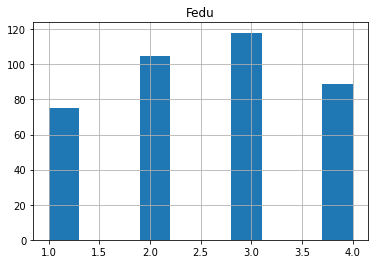

3.0    118
2.0    105
4.0     89
1.0     75
0.0      2
Name: Fedu, dtype: int64

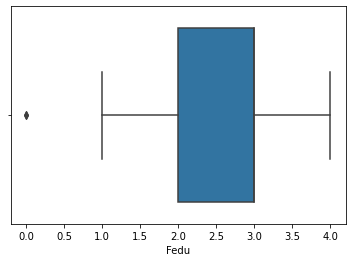

In [14]:
#Fedu исправим несуществубщее значение 40.0, скорее всего ошибка и должно быть 4
#заменим пустоты на медиану. Есть выбросы. В целом чаще встречаются ученики, отцы которых имею сренее образование

data.Fedu = data.Fedu.apply(lambda x: 4 if x == 40 else x)
remove_nan('Fedu', data.Fedu.median())
view_column_info(data.Fedu)
display(data.Fedu.value_counts())


В столбце Mjob уникальных значений 5
['at_home' 'health' 'other' 'services' 'teacher' None]


,Mjob
other,127
services,98
at_home,58
teacher,55
health,32


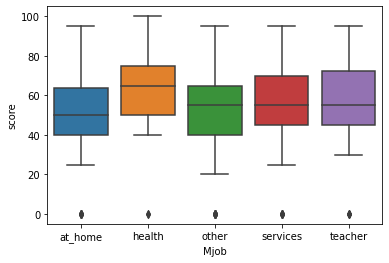

In [15]:
#Mjob заменим пустоты. 
#Количество учащихся примерно одинаковое в зависимости от сферы работы матери
#Успеваемость лучше у учеников, чьи матери работают в сфрере здравохранения

remove_nan('Mjob', None)
view_column_info(data.Mjob)


В столбце Fjob уникальных значений 5
['teacher' 'other' None 'health' 'services' 'at_home']


,Fjob
other,194
services,99
teacher,29
at_home,16
health,15


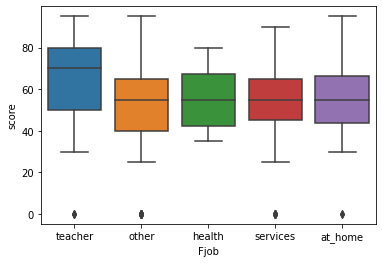

In [16]:
#Fjob заменим пустоты. 
#Меньше всего учеников, чьи отцы работают на гос службе
#Успеваемтось лучше у учеников, чьи отцы работают учителями. У остальных средние показатели одинаковы

remove_nan('Fjob', None)
view_column_info(data.Fjob)


В столбце reason уникальных значений 4
['course' 'other' 'home' 'reputation' None]


,reason
course,135
reputation,102
home,101
other,34


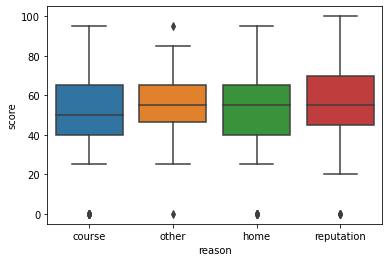

In [17]:
#reason заменим пустоты. 
#Больше всего оценок выше среднего бала в школах с хорошей репутацией, а ниже среднего у учеников, выбирающих школу ближе к дому
#У учеников, выбирающих школу по образовательной программе,тоже преобладают оценки выше среднего, 
#но, в целом, средняя оценка ниже школ с хорошей репутаций

remove_nan('reason', None)
view_column_info(data.reason)


В столбце guardian уникальных значений 3
['mother' 'father' 'other' None]


,guardian
mother,248
father,86
other,24


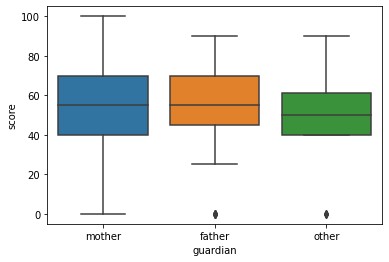

In [18]:
#guardian заменим пустоты. 
#Чаще всего опекуном является мать. В среднем успеваемость учеников, у обоих опекунов (и мать и отец) похожи.
#Самая плоъхая усепваемость у тех, чей опекун находится в категории - другой

remove_nan('guardian', None)
view_column_info(data.guardian)


В столбце traveltime уникальных значений 4
[1.0, 2.0, 3.0, 4.0]
Границы выбросов [-0.5, 3.5]
count    389.000000
mean       1.403599
std        0.676625
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        4.000000
Name: traveltime, dtype: float64


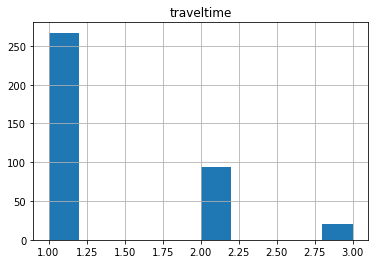

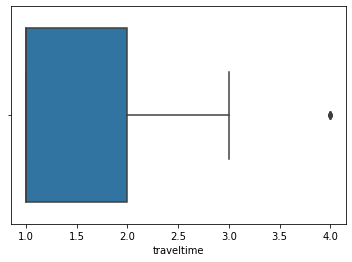

In [19]:
#traveltime есть выбросы. заменим пустоты. 
#Основная масса учеников тратит на дорогу в школе меньше получаса
remove_nan('traveltime', data.traveltime.median())
view_column_info(data.traveltime)


В столбце studytime уникальных значений 4
[1.0, 2.0, 3.0, 4.0]
Границы выбросов [-0.5, 3.5]
count    389.000000
mean       2.035990
std        0.839575
min        1.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        4.000000
Name: studytime, dtype: float64


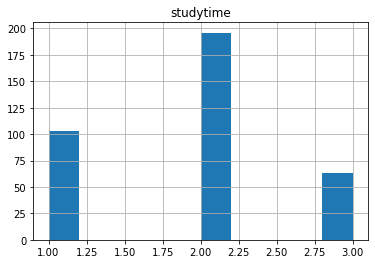

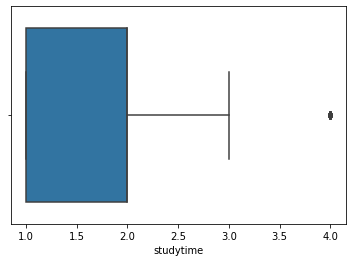

In [20]:
#studytime есть выбросы. заменим пустоты. 
#Основная масса учеников тратит на дополнительную учебу до 5 часов в неделю

remove_nan('studytime', data.studytime.median())
view_column_info(data.studytime)


В столбце failures уникальных значений 4
[0.0, 1.0, 2.0, 3.0]
Границы выбросов [0.0, 0.0]
count    389.000000
mean       0.308483
std        0.712521
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        3.000000
Name: failures, dtype: float64


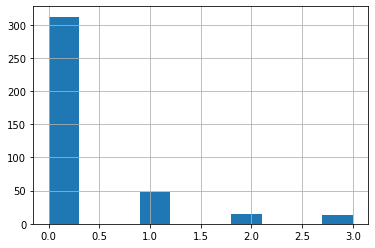

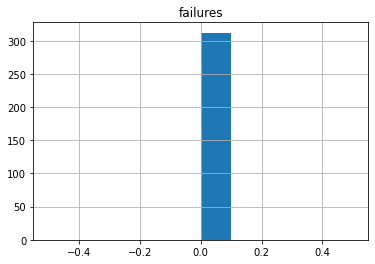

0.0    312
1.0     48
2.0     15
3.0     14
Name: failures, dtype: int64

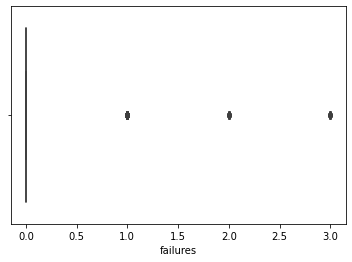

In [21]:
#failures есть выбросы. заменим пустоты. 

remove_nan('failures', data.failures.median())
data.failures.hist()
view_column_info(data.failures)
data.failures.value_counts()


В столбце schoolsup уникальных значений 2
['yes' 'no' None]


,schoolsup
no,331
yes,49


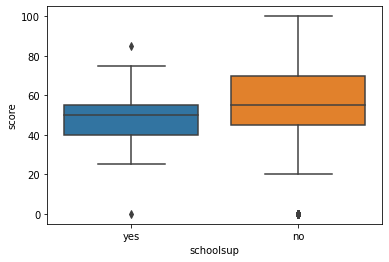

In [22]:
#schoolsup заменим пустоты. Больше учеников без образовательной поддержки, их успеваемость выше

remove_nan('schoolsup', None)
view_column_info(data.schoolsup)


В столбце famsup уникальных значений 2
['no' 'yes' None]


,famsup
yes,216
no,135


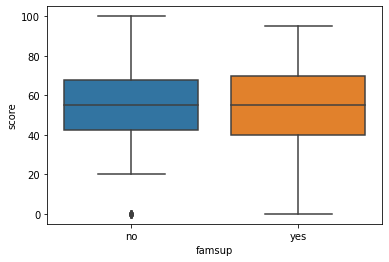

In [23]:
#famsup заменим пустоты. Больше учеников с семейной образовательной поддержкой, 
#но  в среднем успеваемость такаяже как и у учеников без поддержки

remove_nan('famsup', None)
view_column_info(data.famsup)


В столбце paid уникальных значений 2
['no' None 'yes']


,paid
no,197
yes,153


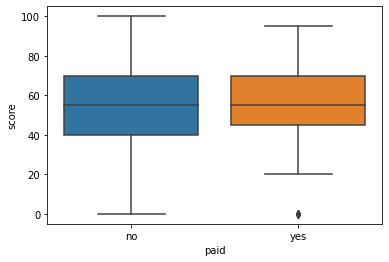

In [24]:
#paid заменим пустоты. Чуть меньше половины учеников платят за дополнительные занятия по математике
#Разборс оценок у них кучнее, но средний бал не сильно отличается от остальных

remove_nan('paid', None)
view_column_info(data.paid)


В столбце activities уникальных значений 2
['no' 'yes' None]


,activities
yes,192
no,183


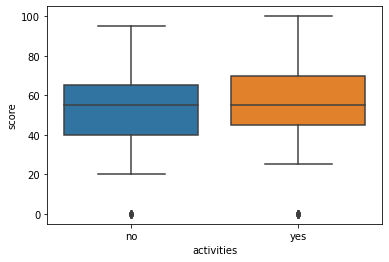

In [25]:
#activities заменим пустоты. Дополнительные внеучебные занятия посещаетп римерна половина учащихся
#Их средний бал выше остальных учеников

remove_nan('activities', None)
view_column_info(data.activities)


В столбце nursery уникальных значений 2
['yes' 'no' None]


,nursery
yes,297
no,77


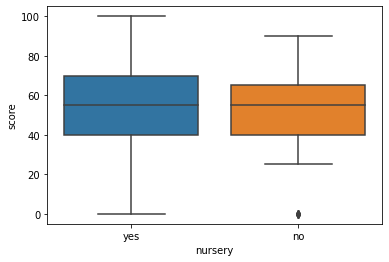

In [26]:
#nursery заменим пустоты. Большая часть учеников посещала детский сад.
#Их средний бал не сильно превышет остальных учеников, а разброс оценок выше

remove_nan('nursery', None)
view_column_info(data.nursery)


В столбце studytime уникальных значений 4
[1.0, 2.0, 3.0, 4.0]
Границы выбросов [-0.5, 3.5]
count    389.000000
mean       2.035990
std        0.839575
min        1.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        4.000000
Name: studytime, dtype: float64


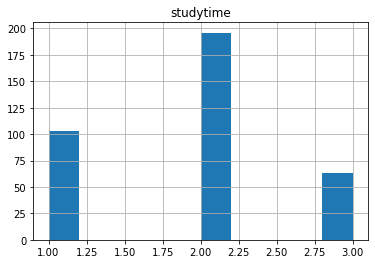

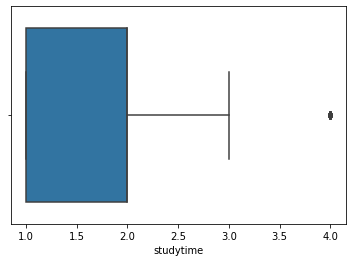

In [27]:
#studytime пропусков нет. Большинство учеников тратят меньше 5 часов в неделю на учебу вне школы

view_column_info(data.studytime)


В столбце higher уникальных значений 2
['yes' None 'no']


,higher
yes,350
no,19


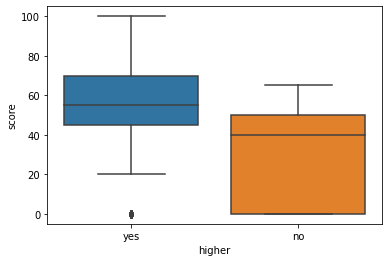

In [28]:
#higher заменим пустоты. Большинство хочет получить высшее образование. 
#Их успеваемость сильно отличается от тех кто не планирует получить высшее образование
#Не планирующие обучаться дальше имеют самые низкие показатели, подавляющее большинство  - ниже среднего балла

remove_nan('higher', None)
view_column_info(data.higher)


В столбце internet уникальных значений 2
[None 'yes' 'no']


,internet
yes,300
no,55


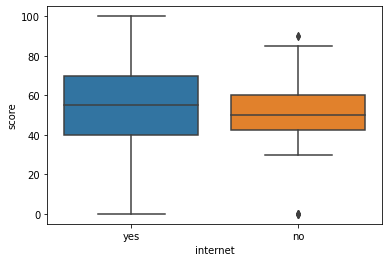

In [29]:
#internet заменим пустоты. У большинства учеников есть интернет дома 
#Разброс оценок у них выше
#Ученики без интернета имеют чуть более низкие средние оценки, но их разброс меньше

remove_nan('internet', None)
view_column_info(data.internet)


В столбце romantic уникальных значений 2
['no' None 'yes']


,romantic
no,235
yes,123


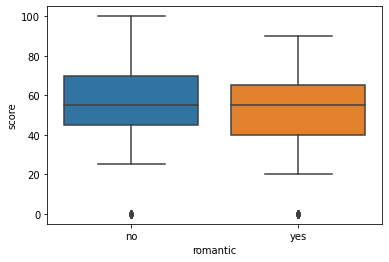

In [30]:
#romantic заменим пустоты. 
#Успеваемость учеников, состоящих в романтических отношениях, немного хуже. 

remove_nan('romantic', None)
view_column_info(data.romantic)


В столбце famrel уникальных значений 5
[1.0, 2.0, 3.0, 4.0, 5.0]
Границы выбросов [4.0, 4.0]
count    389.000000
mean       3.940874
std        0.875850
min        1.000000
25%        4.000000
50%        4.000000
75%        4.000000
max        5.000000
Name: famrel, dtype: float64


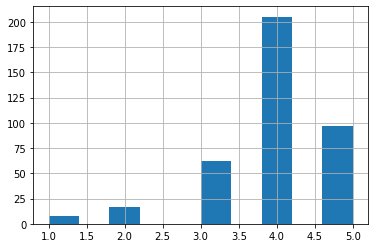

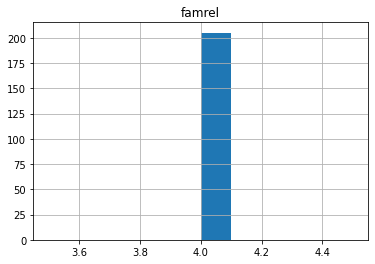

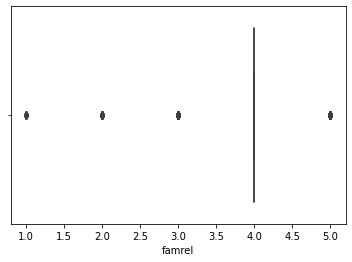

In [31]:
#famrel заменим пустот и несуществующие значения, -1 - видимо опечатка, т.к. есть похожая категория 1 
#Есть выбросы. У основной массы учеников семейные отношения хорошие. 

data.famrel = data.famrel.apply(lambda x: 1 if x == -1 else x)
remove_nan('famrel', data.famrel.median())
data.famrel.hist()
view_column_info(data.famrel)


В столбце freetime уникальных значений 5
[1.0, 2.0, 3.0, 4.0, 5.0]
Границы выбросов [1.5, 5.5]
count    389.000000
mean       3.218509
std        0.982353
min        1.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: freetime, dtype: float64


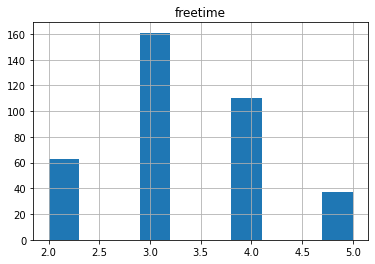

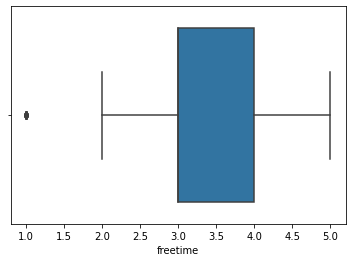

In [32]:
#freetime заменим пустоты. Есть выбросы
#У большей части учеников среднее количество свободного времени 

remove_nan('freetime', data.freetime.median())
view_column_info(data.freetime)


В столбце goout уникальных значений 5
[1.0, 2.0, 3.0, 4.0, 5.0]
Границы выбросов [-1.0, 7.0]
count    389.000000
mean       3.092545
std        1.106062
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: goout, dtype: float64


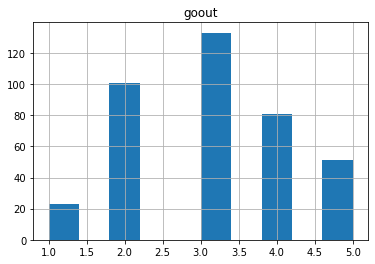

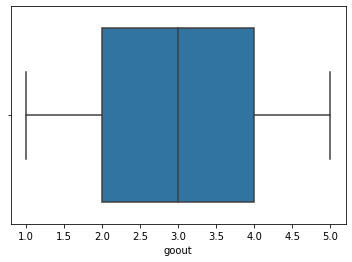

In [33]:
#goout заменим пропуски. Выбросов нет. Среднее и медиана близки,заменим пропуски на медиану

remove_nan('goout', data.goout.median())
view_column_info(data.goout)


В столбце health уникальных значений 5
[1.0, 2.0, 3.0, 4.0, 5.0]
Границы выбросов [0.0, 8.0]
count    389.000000
mean       3.547558
std        1.377629
min        1.000000
25%        3.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: health, dtype: float64


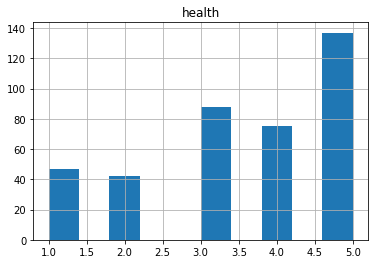

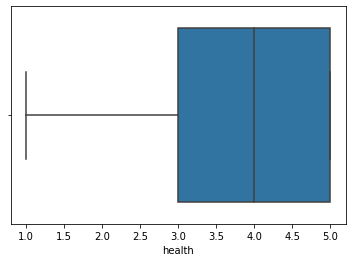

In [34]:
#health есть пропуски. Выбросов нет, поэтому заменим на среднее 

remove_nan('health', data.health.median())
view_column_info(data.health)


В столбце absences уникальных значений 36
[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 28.0, 30.0, 38.0, 40.0, 54.0, 56.0, 75.0, 212.0, 385.0]
Границы выбросов [-12.0, 20.0]
count    389.000000
mean       7.226221
std       23.284884
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max      385.000000
Name: absences, dtype: float64


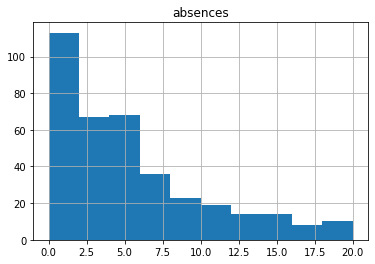

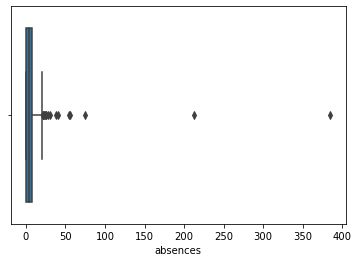

In [35]:
#absences -  в столбце есть выбросы, а значения 212 и 385 сильно отличатся от остальных. 
#заменим nan на медиану

remove_nan('absences', data.absences.median())
view_column_info(data.absences)


In [36]:
#absences и famrel скореллированы почти полностью, ислючим absences                                
data.corr()['score'].sort_values()

failures              -0.337187
age                   -0.155726
goout                 -0.127742
studytime, granular   -0.115741
health                -0.073208
traveltime            -0.056535
freetime               0.017481
famrel                 0.052902
absences               0.062642
studytime              0.114295
Fedu                   0.124559
Medu                   0.209758
score                  1.000000
Name: score, dtype: float64

In [37]:
def get_stat_dif(column):
    
    cols = data.loc[:,column].value_counts().index[:10]
    combinations_all = list(combinations(cols,2))
    for comb in combinations_all:
        if ttest_ind(data.loc[data.loc[:,column]==comb[0],'score'],
                    data.loc[data.loc[:,column]==comb[1],'score']).pvalue \
        <= 0.05/len(combinations_all):
            print('Найдены статистически значимиые различия для колонки ',column)
            break

for col in data.select_dtypes(include=['object']):
    get_stat_dif(col)
    

Найдены статистически значимиые различия для колонки  address
Найдены статистически значимиые различия для колонки  Mjob
Найдены статистически значимиые различия для колонки  higher
Найдены статистически значимиые различия для колонки  romantic


In [43]:
#Выводы
#Самые важные параметры, рекомендуемые для дальнейшего построения модели:
#результаты теста - address, Mjob, higher, romantic, также я бы посмотрела  schoolsup, internet
#Большая взаимосвязь обнаружена от параметров failures,age,goout, studytime,Medu, Fedu, их тоже можно включить в модель                                      
#
data[['address','Mjob','higher','romantic','schoolsup','internet','failures','age']]


,address,Mjob,higher,romantic,schoolsup,internet
0,U,at_home,yes,no,yes,None
1,U,at_home,yes,no,no,yes
2,U,at_home,yes,None,yes,yes
3,U,health,yes,yes,no,yes
4,U,other,yes,no,no,no
...,...,...,...,...,...,...
390,U,services,yes,no,no,no
391,U,services,yes,no,no,yes
392,R,other,None,no,None,no
393,R,services,yes,no,no,yes
